# 자전거 파일 분석

서울특별시 공공자전거 대여이력 정보 2019년 6월

서울특별시 공공자전거 대여정보_201906_1.csv

서울특별시 공공자전거 대여정보_201906_2.csv

서울특별시 공공자전거 대여정보_201906_3.csv

# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [6]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
nanum_font number: 0


In [7]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [8]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [9]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [1]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [2]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [3]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# 1. 데이터 수집 및 라이브러리 임포트

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 가공

## 2-1. 분석할 데이터프레임 만들기

In [5]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  첫번째 파일을 읽어들이고 확인한다.

bike_1 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_1.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])

bike_1.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00


In [6]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  두번째 파일을 읽어들이고 확인한다.

bike_2 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_2.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])

bike_2.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-18282,2019-06-01 21:15:39,764,목동청소년수련관,7,2019-06-01 21:22:20,735,영도초등학교,9,6,0.00
1,SPB-06551,2019-06-01 21:28:21,703,오목교역 7번출구 앞,1,2019-06-01 21:40:41,735,영도초등학교,9,11,2210.00
2,SPB-22632,2019-06-01 21:29:30,704,남부법원검찰청 교차로,3,2019-06-01 21:40:51,735,영도초등학교,7,10,1870.00
3,SPB-08605,2019-06-01 21:38:13,731,서울시 도로환경관리센터,10,2019-06-01 21:51:27,735,영도초등학교,9,12,1480.00
4,SPB-01650,2019-06-01 21:39:16,731,서울시 도로환경관리센터,10,2019-06-01 21:55:53,735,영도초등학교,8,16,1500.00


In [ ]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  세번째 파일을 읽어들이고 확인한다.

bike_3 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_3.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bike_3.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-15349,2019-06-23 20:52:11,1625,상계역(4번출구),4,2019-06-23 20:58:08,1692,온곡초교 교차로,6,5,870.00
1,SPB-09319,2019-06-23 20:44:41,1692,온곡초교 교차로,1,2019-06-23 20:58:34,1692,온곡초교 교차로,8,14,2420.00
2,SPB-13041,2019-06-23 20:51:23,1619,중계동 하나프라자빌딩 앞(중1-1),6,2019-06-23 21:11:33,1692,온곡초교 교차로,5,18,2420.00
3,SPB-18582,2019-06-23 21:43:26,1674,서울북부고용센터앞,15,2019-06-23 22:13:20,1692,온곡초교 교차로,5,28,3110.00
4,SPB-00104,2019-06-23 21:45:17,1674,서울북부고용센터앞,5,2019-06-23 22:13:27,1692,온곡초교 교차로,10,27,3120.00


In [ ]:
# 세개의 데이터프레임 bike_1, bike_2, bike_3를 합치고 최종 데이터프레임 bike_ride를 확인한다.

bike_ride = pd.concat([bike_1, bike_2, bike_3], axis = 'index', ignore_index = True)

bike_ride

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00
...,...,...,...,...,...,...,...,...,...,...,...
2215627,SPB-22438,2019-06-24 07:40:39,240,문래역 4번출구 앞,8,2019-06-24 07:54:16,9998,영남주차장 정비센터,10,13,900.00
2215628,SPB-24455,2019-06-25 07:34:58,240,문래역 4번출구 앞,7,2019-06-25 07:42:14,9998,영남주차장 정비센터,4,6,880.00
2215629,SPB-24557,2019-06-26 08:19:57,240,문래역 4번출구 앞,4,2019-06-26 08:27:49,9998,영남주차장 정비센터,10,7,930.00
2215630,SPB-00649,2019-06-27 07:38:12,240,문래역 4번출구 앞,9,2019-06-27 07:49:52,9998,영남주차장 정비센터,10,11,1030.00


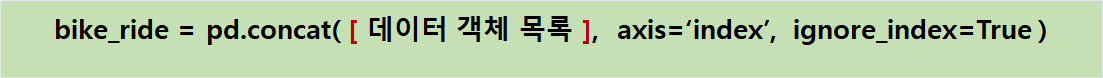

In [ ]:
# 실습 : pd.concat()



## 2-2. 데이터프레임 관찰하기

In [ ]:
# bike_ride 의 정보를 알려주는 명령어는 ?

bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      datetime64[ns]
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 185.9+ MB


In [ ]:
# 실습 : bike_ride 의 정보를 알려주는 명령어는 ?



In [ ]:
# bike_ride 의 전체 행수는 ?

bike_ride.shape[0]

2215632

In [ ]:
# 실습 : bike_ride 의 전체 행수는 ?



In [ ]:
# bike_ride 의 인덱스는 ?

bike_ride.index

RangeIndex(start=0, stop=2215632, step=1)

In [ ]:
# 실습 : bike_ride 의 인덱스는 ?



In [ ]:
# bike_ride 의 열수는 ?

bike_ride.shape[1]

11

In [ ]:
# 실습 : bike_ride 의 열수는 ?



In [ ]:
# bike_ride 의 컬럼은 ?

bike_ride.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [ ]:
# 실습 : bike_ride 의 컬럼은 ?



In [ ]:
# bike_ride 의 컬럼의 데이터타입은 ?

bike_ride.dtypes

자전거번호               object
대여일시        datetime64[ns]
대여 대여소번호             int64
대여 대여소명             object
대여거치대                int64
반납일시        datetime64[ns]
반납대여소번호              int64
반납대여소명              object
반납거치대                int64
이용시간                 int64
이용거리               float64
dtype: object

In [ ]:
# 실습 : bike_ride 의 컬럼의 데이터타입은 ?



In [ ]:
# bike_ride 의 shape은 ?

bike_ride.shape

(2215632, 11)

In [ ]:
# 실습 : bike_ride 의 shape은 ?



In [ ]:
# bike_ride 데이터프레임의 요약통계 알아보기

bike_ride.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00
mean,1226.15,7.01,1228.35,6.97,27.17,3912.92
std,849.92,5.24,846.23,5.24,29.08,5145.47
min,3.00,1.00,3.00,1.00,1.00,0.00
25%,505.00,3.00,512.00,3.00,8.00,1220.00
50%,1159.00,6.00,1159.00,6.00,17.00,2270.00
75%,1846.00,10.00,1839.00,10.00,37.00,4670.00
max,9998.00,40.00,9998.00,40.00,3133.00,232310.00


분석결과 : 이용시간은 평균이 약 27분, 이용거리는 약 4km

In [ ]:
# 실습 : bike_ride 데이터프레임의 요약통계 알아보기



In [ ]:
# 데이터타입이 object와 np.datetime64인 경우의 요약통계

bike_ride.describe(include = ['object', 'datetime64'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명
count,2215632,2215632,2215632,2215632,2215632
unique,19029,1317207,1543,1321020,1543
top,SPB-17237,2019-06-05 18:06:56,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:30,뚝섬유원지역 1번출구 앞
freq,292,13,12617,18,14019
first,NaN,2019-06-01 00:00:02,NaN,2019-06-01 00:02:51,NaN
last,NaN,2019-06-30 23:59:56,NaN,2019-07-03 03:09:28,NaN


분석결과 : 대여소는 1543 개가 있고,   자전거는 19029 대가 있다. 대여 대여소명과 반납대여소명에서 가장 빈도가 많은 것은 뚝섬유원지역 1번출구 앞이다. 


In [ ]:
# 실습 : 데이터타입이 object와 np.datetime64인 경우의 요약통계



In [ ]:
# 누락값 조사
# 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.

bike_ride.isnull()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2215627,False,False,False,False,False,False,False,False,False,False,False
2215628,False,False,False,False,False,False,False,False,False,False,False
2215629,False,False,False,False,False,False,False,False,False,False,False
2215630,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 실습 : 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.



In [ ]:
# 누락값 조사
# 2단계 -> 각각의 컬럼값의 합을 구한다.

bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [ ]:
# 실습 : 2단계 -> 각각의 컬럼값의 합을 구한다.



In [ ]:
# bike_ride의 처음 5개 행 보여주기

bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00


In [ ]:
# 실습 : bike_ride의 처음 5개 행 보여주기



In [ ]:
# bike_ride의 마지막 5개 행 보여주기

bike_ride.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
2215627,SPB-22438,2019-06-24 07:40:39,240,문래역 4번출구 앞,8,2019-06-24 07:54:16,9998,영남주차장 정비센터,10,13,900.00
2215628,SPB-24455,2019-06-25 07:34:58,240,문래역 4번출구 앞,7,2019-06-25 07:42:14,9998,영남주차장 정비센터,4,6,880.00
2215629,SPB-24557,2019-06-26 08:19:57,240,문래역 4번출구 앞,4,2019-06-26 08:27:49,9998,영남주차장 정비센터,10,7,930.00
2215630,SPB-00649,2019-06-27 07:38:12,240,문래역 4번출구 앞,9,2019-06-27 07:49:52,9998,영남주차장 정비센터,10,11,1030.00
2215631,SPB-14209,2019-06-28 07:37:07,240,문래역 4번출구 앞,10,2019-06-28 07:43:54,9998,영남주차장 정비센터,10,6,1010.00


In [ ]:
# 실습 : bike_ride의 마지막 5개 행 보여주기



## 2-3. 분석주제에 맞는 새로운 컬럼 추가하기

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가

요일 = ['월','화','수','목','금','토','일']
bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])
bike_ride['요일']

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 1단계 >  bike_ride['대여일시']는 날짜 데이터타입을 가진다.

bike_ride['대여일시']

0         2019-06-03 08:49:27
1         2019-06-03 08:33:22
2         2019-06-05 08:27:47
3         2019-06-05 08:46:29
4         2019-06-10 08:27:26
                  ...        
2215627   2019-06-24 07:40:39
2215628   2019-06-25 07:34:58
2215629   2019-06-26 08:19:57
2215630   2019-06-27 07:38:12
2215631   2019-06-28 07:37:07
Name: 대여일시, Length: 2215632, dtype: datetime64[ns]

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 1단계 > bike_ride['대여일시']는 날짜 데이터타입을 가진다.



In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 2단계 > bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일

bike_ride['대여일시'].dt.dayofweek

0          0
1          0
2          2
3          2
4          0
          ..
2215627    0
2215628    1
2215629    2
2215630    3
2215631    4
Name: 대여일시, Length: 2215632, dtype: int64

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 2단계 > bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일



In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 3단계 : apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.

bike_ride['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 대여일시, Length: 2215632, dtype: object

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 3단계 > apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.

#bike_ride['대여일시'].dt.dayofweek.apply(    )

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 4단계 > bike_ride에 새로운 컬럼인 '요일'을 추가한다.

bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])
bike_ride['요일']

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 4단계 > bike_ride에 새로운 컬럼인 '요일'을 추가한다.



In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# bike_ride에 '요일'컬럼이 추가된 것을 확인한다.

bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00,월,평일,3,8,9
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00,수,평일,5,8,8
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00,수,평일,5,8,8
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00,월,평일,10,8,8


In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : bike_ride에 '요일'컬럼이 추가된 것을 확인한다.



In [ ]:
# 주중/주말공휴일 구분
bike_ride['주말구분'] = bike_ride['대여일시'].dt.dayofweek.apply(\
                                lambda x : '평일' if x < 5 else '주말')

# 일자 컬럼 추가
bike_ride['일자'] = bike_ride['대여일시'].dt.day

# 시간대 컬럼 추가
bike_ride['대여시간대'] = bike_ride['대여일시'].dt.hour
bike_ride['반납시간대'] =  bike_ride['반납일시'].dt.hour

bike_ride.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00,월,평일,3,8,9


In [ ]:
# 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임의 정보를 알아본다.

bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      datetime64[ns]
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
 11  요일        object        
 12  주말구분      object        
 13  일자        int64         
 14  대여시간대     int64         
 15  반납시간대     int64         
dtypes: datetime64[ns](2), float64(1), int64(8), object(5)
memory usage: 270.5+ MB


In [ ]:
# 실습 : 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임의 정보를 알아본다.



In [ ]:
# bike_ride 수치데이터타입을 가진 컬럼들의 요약통계를 알아본다.

bike_ride.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,일자,대여시간대,반납시간대
count,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00
mean,1226.15,7.01,1228.35,6.97,27.17,3912.92,15.74,14.49,14.50
std,849.92,5.24,846.23,5.24,29.08,5145.47,8.64,6.33,6.59
min,3.00,1.00,3.00,1.00,1.00,0.00,1.00,0.00,0.00
25%,505.00,3.00,512.00,3.00,8.00,1220.00,8.00,10.00,10.00
50%,1159.00,6.00,1159.00,6.00,17.00,2270.00,16.00,16.00,17.00
75%,1846.00,10.00,1839.00,10.00,37.00,4670.00,23.00,19.00,20.00
max,9998.00,40.00,9998.00,40.00,3133.00,232310.00,30.00,23.00,23.00


분석결과 : 이용시간의 평균은 27분정도이고 이용거리의 평균은 4000m정도이다.

In [ ]:
# 실습 : bike_ride 수치데이터타입을 가진 컬럼들의 요약통계를 알아본다.



In [ ]:
# bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.

bike_ride.describe(include=['object', 'datetime64'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명,요일,주말구분
count,2215632,2215632,2215632,2215632,2215632,2215632,2215632
unique,19029,1317207,1543,1321020,1543,7,2
top,SPB-17237,2019-06-05 18:06:56,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:30,뚝섬유원지역 1번출구 앞,토,평일
freq,292,13,12617,18,14019,375943,1478599
first,NaN,2019-06-01 00:00:02,NaN,2019-06-01 00:02:51,NaN,NaN,NaN
last,NaN,2019-06-30 23:59:56,NaN,2019-07-03 03:09:28,NaN,NaN,NaN


분석결과 : 요일에서 가장 많은 빈도는 토요일이고 주말구분에서는 평일이 빈도가 많다.

In [ ]:
# 실습 : bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.



In [ ]:
# bike_ride의 추가된 컬럼들의 누락값 여부를 알아본다.

bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
주말구분        0
일자          0
대여시간대       0
반납시간대       0
dtype: int64

In [ ]:
# 실습 : bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.

